In [2]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import pdb

In [3]:
import os

In [4]:
def imshow(img):
    plt.imshow(np.transpose(img, (1,2,0)))
    plt.show()

In [35]:
class Config:
    genuine_directory = "sample_Signature/genuine/"
    forged_directory = "sample_Signature/forged/"
    training_batch_size = 8
    training_number_epochs = 20

In [10]:
genuine_folder_dataset = dset.ImageFolder(root=Config.genuine_directory)
forged_folder_dataset = dset.ImageFolder(root=Config.forged_directory)

In [11]:
b = random.choice(forged_folder_dataset.classes)

In [12]:
forged_folder_dataset.classes

['001',
 '003',
 '004',
 '005',
 '007',
 '011',
 '012',
 '013',
 '017',
 '023',
 '025',
 '033',
 '088']

In [13]:
'002' in forged_folder_dataset.classes

False

In [14]:
t = Image.open('sample_Signature/genuine/001/NFI-00103001.png').convert("RGB")

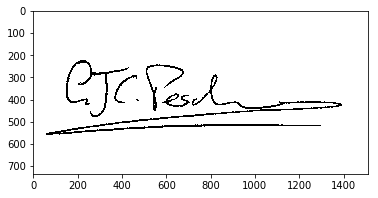

In [15]:
plt.imshow(t)

In [16]:
np.array(Image.open('sample_Signature/genuine/006/NFI-00601006.png').convert("L")).shape

(88, 191)

In [17]:
genuine_folder_dataset.imgs

[('sample_Signature/genuine/001/NFI-00101001.png', 0),
 ('sample_Signature/genuine/001/NFI-00102001.png', 0),
 ('sample_Signature/genuine/001/NFI-00103001.png', 0),
 ('sample_Signature/genuine/001/NFI-00104001.png', 0),
 ('sample_Signature/genuine/001/NFI-00105001.png', 0),
 ('sample_Signature/genuine/002/NFI-00201002.png', 1),
 ('sample_Signature/genuine/002/NFI-00202002.png', 1),
 ('sample_Signature/genuine/002/NFI-00203002.png', 1),
 ('sample_Signature/genuine/002/NFI-00204002.png', 1),
 ('sample_Signature/genuine/002/NFI-00205002.png', 1),
 ('sample_Signature/genuine/003/NFI-00301003.png', 2),
 ('sample_Signature/genuine/003/NFI-00302003.png', 2),
 ('sample_Signature/genuine/003/NFI-00303003.png', 2),
 ('sample_Signature/genuine/003/NFI-00304003.png', 2),
 ('sample_Signature/genuine/003/NFI-00305003.png', 2),
 ('sample_Signature/genuine/004/NFI-00401004.png', 3),
 ('sample_Signature/genuine/004/NFI-00402004.png', 3),
 ('sample_Signature/genuine/004/NFI-00403004.png', 3),
 ('sample_

In [18]:
t = random.choice(genuine_folder_dataset.classes)

In [19]:
a = os.listdir("{}{}".format(Config.genuine_directory, t))

In [20]:
name = "{}{}".format(Config.genuine_directory, t)

In [21]:
name

'sample_Signature/genuine/017'

In [22]:
random1 = random.choice(os.listdir("{}{}".format(Config.genuine_directory, t)))

In [23]:
t = (Image.open(f'{name}/{random1}'))

In [24]:
t = t.convert("L")

In [25]:
np.array(t).shape

(75, 261)

In [26]:
class SiameseNetworkDataset(Dataset):
    def __init__(self, genuineImagesDataset, forgedImageDataset):
        self.genuineImages = genuineImagesDataset
        self.forgedImages = forgedImageDataset
    
    def __getitem__(self, index):
        genuine_img_random_folder = random.choice(self.genuineImages.classes)

        genuine_name = os.listdir("{}{}".format(Config.genuine_directory, genuine_img_random_folder))
        img0_genuine = random.choice(genuine_name)
        genuine_name = "{}{}/{}".format(Config.genuine_directory, genuine_img_random_folder, img0_genuine)
        genuine = random.randint(0,1)
        if genuine:
            name = os.listdir("{}{}".format(Config.genuine_directory, genuine_img_random_folder))
            img1 = random.choice(name)
            name = "{}{}/{}".format(Config.genuine_directory, genuine_img_random_folder, img1)
        else:
            if genuine_img_random_folder in self.forgedImages.classes:
                name = os.listdir("{}{}".format(Config.forged_directory, genuine_img_random_folder))
                img1 = random.choice(name)
                name = "{}{}/{}".format(Config.forged_directory, genuine_img_random_folder, img1)
            else:
                forged_img_random_folder = random.choice(self.forgedImages.classes)
                name = os.listdir("{}{}".format(Config.forged_directory, forged_img_random_folder))
                img1 = random.choice(name)
                name = "{}{}/{}".format(Config.forged_directory, forged_img_random_folder, img1)
                
    
        img0_genuine = np.array(Image.open(genuine_name).convert("RGB").resize((1000,1000)))
        img1 = np.array(Image.open(name).convert("RGB").resize((1000,1000)))
        
        return img0_genuine, img1 , torch.from_numpy(np.array([int(genuine)],dtype=np.float32))
    
    def __len__(self):
        return len(self.genuineImages.imgs)